In [9]:
# Linear Regression with scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('medical-charges.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())

Dataset shape: (1338, 7)

First few rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [14]:
# Prepare the data for linear regression
# Handle categorical variables
df_encoded = df.copy()

# Encode categorical variables
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df_encoded['sex'] = le_sex.fit_transform(df['sex'])
df_encoded['smoker'] = le_smoker.fit_transform(df['smoker'])
df_encoded['region'] = le_region.fit_transform(df['region'])

print("Encoded dataset:")
print(df_encoded.head())

# Define features (X) and target variable (y)
X = df_encoded[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df_encoded['charges']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

Encoded dataset:
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

Features shape: (1338, 6)
Target shape: (1338,)


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel trained successfully!")
print(f"Intercept: {model.intercept_:.2f}")
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

Training set size: 1070
Testing set size: 268

Model trained successfully!
Intercept: -11946.61

Coefficients:
age: 257.06
sex: -18.79
bmi: 335.78
children: 425.09
smoker: 23647.82
region: -271.28


In [8]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training RMSE: ${train_rmse:.2f}")
print(f"Testing RMSE: ${test_rmse:.2f}")

# Example prediction
sample_data = [[25, 1, 26.5, 1, 0, 2]]  # age, sex, bmi, children, smoker, region
prediction = model.predict(sample_data)
print(f"\nExample prediction for new data: ${prediction[0]:.2f}")

Training R²: 0.7417
Testing R²: 0.7833
Training RMSE: $6105.79
Testing RMSE: $5799.59

Example prediction for new data: $3241.74


/home/mm/LinearRegression/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


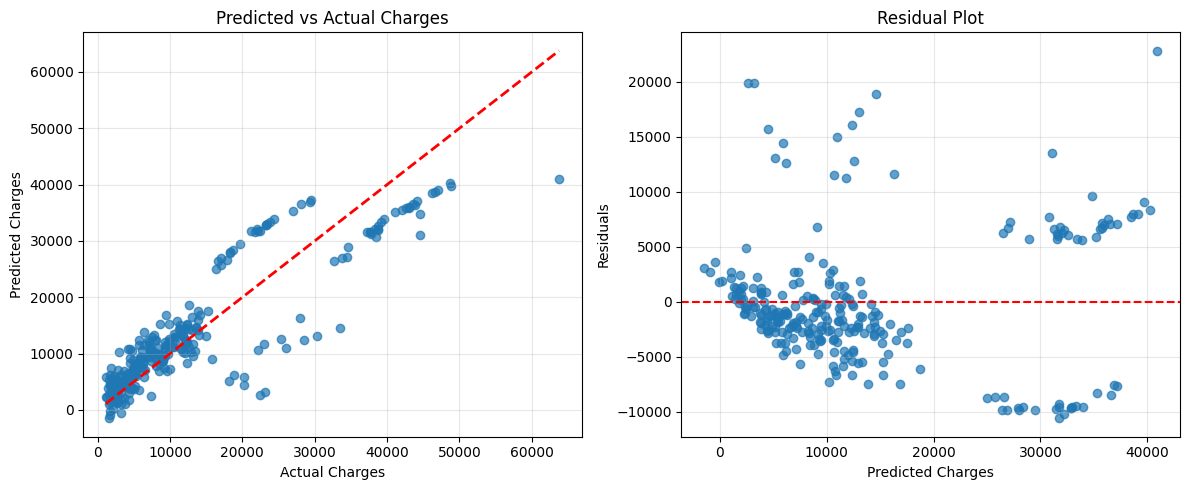

In [11]:
# Visualize the results
plt.figure(figsize=(12, 5))

# Plot 1: Predicted vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Charges')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Method 2: Linear Regression from Scratch with NumPy

Understanding the mathematical foundation behind linear regression helps you grasp what's happening under the hood. Here's how to implement it from scratch:

In [12]:
class LinearRegressionFromScratch:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Add bias term (intercept) by adding a column of ones
        X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
        
        # Calculate weights using the normal equation: w = (X^T * X)^-1 * X^T * y
        X_transpose = X_with_bias.T
        weights = np.linalg.inv(X_transpose.dot(X_with_bias)).dot(X_transpose).dot(y)
        
        self.bias = weights[0]
        self.weights = weights[1:]
        
        return self
    
    def predict(self, X):
        return X.dot(self.weights) + self.bias
    
    def score(self, X, y):
        y_pred = self.predict(X)
        # Calculate R²
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

# Train the custom model
custom_model = LinearRegressionFromScratch()
custom_model.fit(X_train, y_train)

# Make predictions
y_pred_custom = custom_model.predict(X_test)

# Evaluate
custom_r2 = custom_model.score(X_test, y_test)
print(f"Custom Model R²: {custom_r2:.4f}")
print(f"Custom Model Bias: {custom_model.bias:.2f}")
print("Custom Model Weights:", custom_model.weights)

Custom Model R²: 0.7833
Custom Model Bias: -11946.61
Custom Model Weights: [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]


## Method 3: Simple Linear Regression (Single Feature)

For understanding the basics, let's look at simple linear regression with just one feature (e.g., BMI predicting charges):

Simple Linear Regression (BMI only) R²: 0.0397
Slope (BMI coefficient): 392.44
Intercept: 1353.07


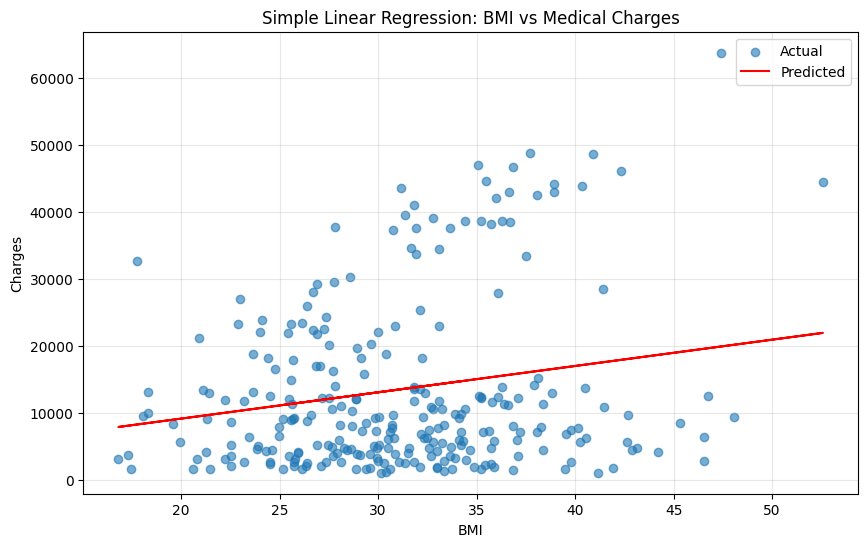


Linear Equation: Charges = 392.44 * BMI + 1353.07


In [13]:
# Simple linear regression: BMI vs Charges
X_simple = df['bmi'].values.reshape(-1, 1)
y_simple = df['charges'].values

# Split the data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Train simple linear regression
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# Predictions
y_pred_simple = simple_model.predict(X_test_simple)

# Results
simple_r2 = r2_score(y_test_simple, y_pred_simple)
print(f"Simple Linear Regression (BMI only) R²: {simple_r2:.4f}")
print(f"Slope (BMI coefficient): {simple_model.coef_[0]:.2f}")
print(f"Intercept: {simple_model.intercept_:.2f}")

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test_simple, alpha=0.6, label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Simple Linear Regression: BMI vs Medical Charges')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# The linear equation
print(f"\nLinear Equation: Charges = {simple_model.coef_[0]:.2f} * BMI + {simple_model.intercept_:.2f}")